In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

# Practice 3-1
student_data_por = pd.read_csv('student-por.csv', sep=';')
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [13]:
# Practice 3-2
student_data_math = pd.read_csv('student-mat.csv',sep=';')
student_data_merged = pd.merge(student_data_por, student_data_math, 
                               on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'],
                              suffixes=['_por', '_math'])
student_data_merged

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_math,freetime_math,goout_math,Dalc_math,Walc_math,health_math,absences_math,G1_math,G2_math,G3_math
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


(array([39.,  0.,  8., 22., 58., 99., 55., 59., 23., 19.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

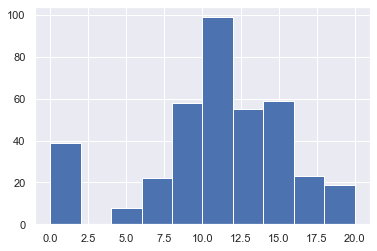

In [18]:
# Practice 3-3
plt.hist(student_data_merged['G3_math'])

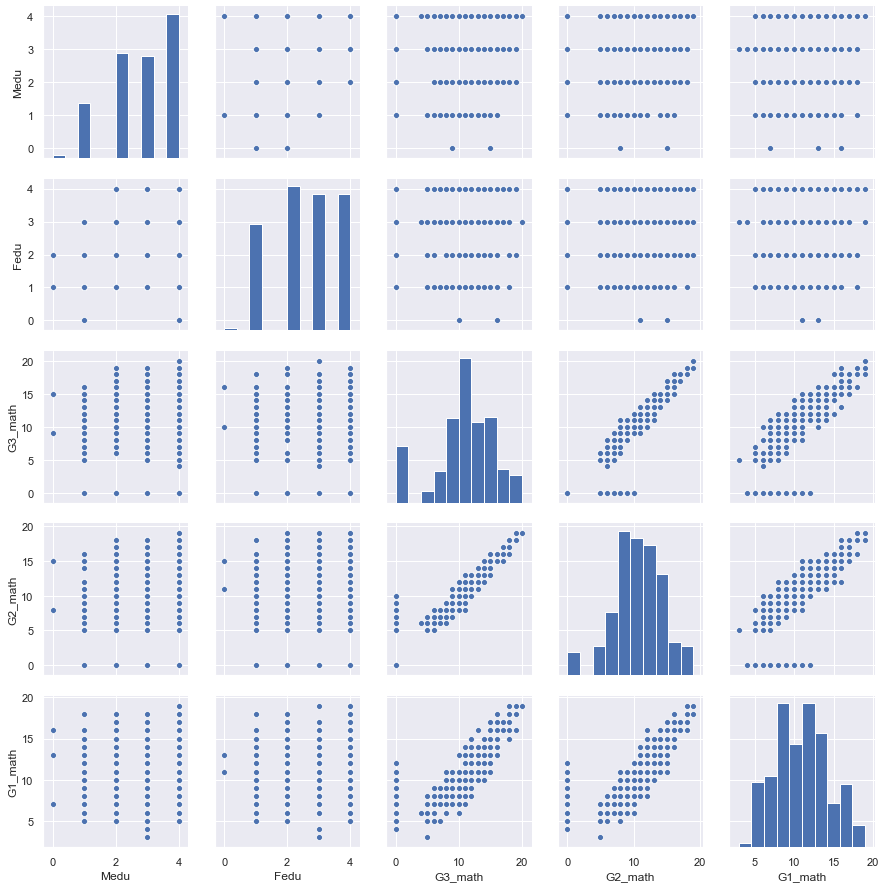

In [20]:
sns.pairplot(student_data_merged[['Medu', 'Fedu', 'G3_math', 'G2_math','G1_math']])

In [6]:
from sklearn import linear_model

# Practice 3-4
X = student_data_por.loc[:,['G1']].values
Y = student_data_por['G3'].values

reg = linear_model.LinearRegression()
reg.fit(X, Y)
print("Regression Coef : ", reg.coef_)
print("Intercept : ", reg.intercept_)
print("Score : ", reg.score(X, Y))

Regression Coef :  [0.973]
Intercept :  0.8203984121064565
Score :  0.6829156800171085


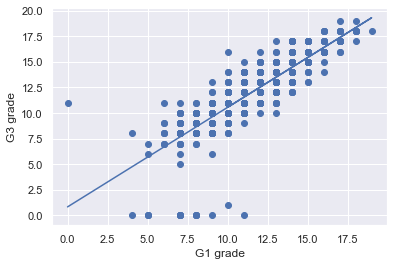

In [8]:
# Practice 3-5
plt.scatter(X,Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

plt.plot(X, reg.predict(X))
plt.grid(True)

In [11]:
# Practice 3-6
Y = student_data_por['G3'].values
X = student_data_por.loc[:,['absences']].values

reg.fit(X, Y)
print("Coef. ", reg.coef_)
print("Intercept.", reg.intercept_)
print("Score : ", reg.score(X, Y))

Coef.  [-0.064]
Intercept. 12.138800862687443
Score :  0.008350131955637385


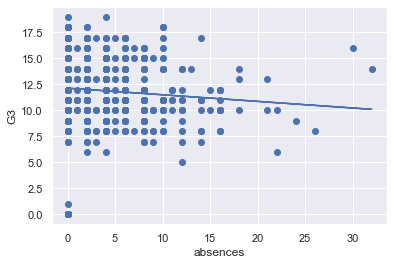

In [12]:
plt.scatter(X, Y)
plt.xlabel('absences')
plt.ylabel('G3')

plt.plot(X, reg.predict(X))
plt.grid(True)